<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv(
    "https://raw.githubusercontent.com/Saketspradhan/Stock-Market-Analysis-System/main/Datasets/PBL_train_v2.csv",
    na_values=['NA','?'])

x_columns = df.columns.drop('CMP').drop('Name')
x = df[x_columns].values
y = df['CMP'].values

x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, kernel_initializer='normal', input_dim=x.shape[1], activation='relu')) # Hidden 1

model.add(Dense(64, kernel_initializer='normal', activation='relu')) # Hidden 2
model.add(Dense(32, kernel_initializer='normal', activation='relu')) # Hidden 3
model.add(Dense(16, kernel_initializer='normal', activation='relu')) # Hidden 4

# model.add(Dense(1, kernel_initializer='normal', activation='linear')) 
model.add(Dense(1)) # Output

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=500, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000, batch_size=64)


Epoch 1/1000
6/6 - 1s - loss: 23132428.0000 - val_loss: 32302354.0000
Epoch 2/1000
6/6 - 0s - loss: 10140805.0000 - val_loss: 2168934.0000
Epoch 3/1000
6/6 - 0s - loss: 7252790.5000 - val_loss: 2237021.5000
Epoch 4/1000
6/6 - 0s - loss: 6683353.5000 - val_loss: 1616562.0000
Epoch 5/1000
6/6 - 0s - loss: 6594105.0000 - val_loss: 1737978.3750
Epoch 6/1000
6/6 - 0s - loss: 6446057.0000 - val_loss: 1594978.5000
Epoch 7/1000
6/6 - 0s - loss: 6337352.0000 - val_loss: 2187611.7500
Epoch 8/1000
6/6 - 0s - loss: 6198662.5000 - val_loss: 1536985.5000
Epoch 9/1000
6/6 - 0s - loss: 6098056.5000 - val_loss: 1643255.8750
Epoch 10/1000
6/6 - 0s - loss: 5611963.5000 - val_loss: 1547589.8750
Epoch 11/1000
6/6 - 0s - loss: 5170839.5000 - val_loss: 1990572.1250
Epoch 12/1000
6/6 - 0s - loss: 4631377.0000 - val_loss: 1569049.7500
Epoch 13/1000
6/6 - 0s - loss: 3818420.5000 - val_loss: 1272206.2500
Epoch 14/1000
6/6 - 0s - loss: 3033851.2500 - val_loss: 1362379.3750
Epoch 15/1000
6/6 - 0s - loss: 2236938.0

# Mean Square Error

The mean square error is the sum of the squared differences between the prediction ($\hat{y}$) and the expected ($y$).  MSE values are not of a particular unit.  If an MSE value has decreased for a model, that is good.  However, beyond this, there is not much more you can determine.  Low MSE values are desired.

$ \mbox{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $


# Root Mean Square Error

The root mean square (RMSE) is essentially the square root of the MSE.  Because of this, the RMSE error is in the same units as the training data outcome. Low RMSE values are desired.

$ \mbox{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

In [4]:
from sklearn import metrics

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 55646.6953125


In [5]:
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 235.89552307128906


In [6]:
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort: t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

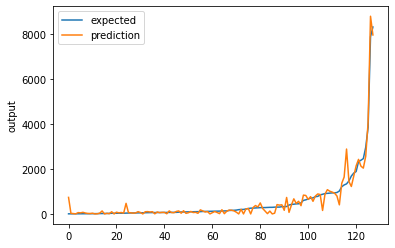

In [7]:
chart_regression(pred.flatten(),y_test)

In [8]:
model.save('model_final.h5')

In [9]:
from google.colab import files
files.download('model_final.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!pip install tensorflowjs

In [11]:
import tensorflowjs as tfjs

In [12]:
tfjs.converters.save_keras_model(model, 'model_final')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________
